<a href="https://colab.research.google.com/github/anjithababuraj/Projects/blob/main/Indian_Weather_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDIAN WEATHER REPOSITORY(DAILY UPDATING)**

Create machine learning model for analyzing India's present weather trends and exploring the relationships between various weather parameters

IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data
data=pd.read_csv('/content/IndianWeatherRepository.csv')
data

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101336,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1709571600,2024-03-04 22:30,17.0,62.6,...,59.9,111.3,3,8,06:42 AM,06:21 PM,01:36 AM,11:43 AM,Waning Crescent,46
101337,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1709571600,2024-03-04 22:30,14.3,57.8,...,93.5,102.3,4,10,05:39 AM,05:24 PM,12:19 AM,10:55 AM,Waning Crescent,46
101338,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1709571600,2024-03-04 22:30,22.6,72.7,...,58.7,71.4,3,7,06:27 AM,06:22 PM,12:47 AM,12:17 PM,Waning Crescent,46
101339,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1709571600,2024-03-04 22:30,29.0,84.2,...,35.3,45.1,2,3,06:33 AM,06:32 PM,12:47 AM,12:35 PM,Waning Crescent,46


DATA INFORMATIONS

In [ ]:
# first 5 rows of the data
data.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [ ]:
# last 5 rows of the data
data.tail()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
101336,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1709571600,2024-03-04 22:30,17.0,62.6,...,59.9,111.3,3,8,06:42 AM,06:21 PM,01:36 AM,11:43 AM,Waning Crescent,46
101337,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1709571600,2024-03-04 22:30,14.3,57.8,...,93.5,102.3,4,10,05:39 AM,05:24 PM,12:19 AM,10:55 AM,Waning Crescent,46
101338,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1709571600,2024-03-04 22:30,22.6,72.7,...,58.7,71.4,3,7,06:27 AM,06:22 PM,12:47 AM,12:17 PM,Waning Crescent,46
101339,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1709571600,2024-03-04 22:30,29.0,84.2,...,35.3,45.1,2,3,06:33 AM,06:32 PM,12:47 AM,12:35 PM,Waning Crescent,46
101340,India,Pendra,Maharashtra,21.93,74.15,Asia/Kolkata,1709571600,2024-03-04 22:30,19.4,66.9,...,16.1,26.0,2,2,06:21 AM,06:07 PM,01:00 AM,11:42 AM,Waning Crescent,46


In [ ]:
# no. of rows and no. of columns in the data
data.shape

(101341, 42)

In [ ]:
# columns included in the data
data.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [ ]:
# datatype of each column
data.dtypes

country                          object
location_name                    object
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64


In [ ]:
# statistical data  of the numerical columns
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,101341.000000,101341.000000,1.013410e+05,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,...,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000
mean,23.097644,80.245510,1.701463e+09,19.516348,67.129494,4.817111,7.757530,152.252099,1013.011979,29.913782,...,15.084600,805.836279,39.413679,14.974446,6.307388,99.502277,116.630565,3.364097,6.861211,52.573233
std,5.791065,5.762573,4.785645e+06,6.205026,11.168887,2.688909,4.319181,114.821173,5.046791,0.148910,...,7.620431,679.310405,28.691776,15.886674,13.164794,101.200727,114.309854,1.454953,3.520185,34.961416
min,7.170000,68.970000,1.693286e+09,-30.700000,-23.300000,2.200000,3.600000,1.000000,991.000000,29.280000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.697231e+09,16.000000,60.800000,2.700000,4.300000,51.000000,1010.000000,29.840000,...,9.700000,427.300000,17.000000,5.300000,1.500000,31.400000,40.700000,2.000000,3.000000,18.000000
50%,23.950000,78.690000,1.701635e+09,20.600000,69.000000,4.300000,6.800000,114.000000,1014.000000,29.940000,...,13.700000,600.800000,34.700000,10.500000,3.200000,67.100000,82.200000,4.000000,9.000000,54.000000
75%,26.770000,83.900000,1.705602e+09,24.000000,75.200000,6.000000,9.700000,267.000000,1016.000000,30.010000,...,19.700000,974.700000,57.200000,19.500000,6.500000,131.300000,152.700000,4.000000,10.000000,88.000000
max,34.570000,95.800000,1.709572e+09,38.300000,100.900000,26.800000,43.200000,360.000000,1073.000000,31.690000,...,82.200000,13565.100000,243.200000,318.100000,557.000000,1374.800000,1537.800000,6.000000,10.000000,100.000000


In [ ]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101341 entries, 0 to 101340
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       101341 non-null  object 
 1   location_name                 101341 non-null  object 
 2   region                        101341 non-null  object 
 3   latitude                      101341 non-null  float64
 4   longitude                     101341 non-null  float64
 5   timezone                      101341 non-null  object 
 6   last_updated_epoch            101341 non-null  int64  
 7   last_updated                  101341 non-null  object 
 8   temperature_celsius           101341 non-null  float64
 9   temperature_fahrenheit        101341 non-null  float64
 10  condition_text                101341 non-null  object 
 11  wind_mph                      101341 non-null  float64
 12  wind_kph                      101341 non-nul

In [ ]:
# to find missing values
data.isna().sum()
# data.dropna(inplace=True)
# if missing value in numeric column fill by mean or median
# if missing value in object column fill by mode

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

DATA PREPROCESSING STEPS

In [ ]:
# to find unique values in the column 'condition_text'
print(data['condition_text'].nunique())
data['condition_text'].unique()

49


array(['Partly cloudy', 'Sunny', 'Cloudy', 'Mist', 'Patchy rain possible',
       'Overcast', 'Patchy light rain with thunder', 'Light rain shower',
       'Moderate or heavy rain shower', 'Clear', 'Light rain',
       'Torrential rain shower', 'Fog', 'Thundery outbreaks possible',
       'Patchy light drizzle', 'Moderate rain', 'Patchy light rain',
       'Moderate rain at times', 'Heavy rain', 'Heavy rain at times',
       'Light drizzle', 'Moderate or heavy rain with thunder',
       'Patchy snow possible', 'Moderate or heavy snow showers',
       'Light snow showers', 'Moderate or heavy snow with thunder',
       'Patchy light snow with thunder', 'Light sleet',
       'Light freezing rain', 'Patchy light snow', 'Patchy moderate snow',
       'Light snow', 'Moderate snow', 'Overcast ', 'Clear ', 'Cloudy ',
       'Partly Cloudy ', 'Patchy rain nearby',
       'Thundery outbreaks in nearby', 'Heavy snow',
       'Patchy light snow in area with thunder',
       'Patchy light rain in a

In [ ]:
# there are 49 different values in this column, need to standardize these values
data['condition_text']=[i.lower() for i in data['condition_text']]
data['condition_text']

0         partly cloudy
1                 sunny
2         partly cloudy
3                cloudy
4                cloudy
              ...      
101336             mist
101337           clear 
101338           clear 
101339             mist
101340           clear 
Name: condition_text, Length: 101341, dtype: object

In [ ]:
data['condition_text']=data['condition_text'].str.replace('cloudy ','cloudy')
data['condition_text']=data['condition_text'].str.replace('clear ','clear')

In [ ]:
print(data['condition_text'].value_counts())

clear                                          59481
mist                                           14167
partly cloudy                                  10256
patchy rain possible                            5126
light rain shower                               2840
fog                                             2005
overcast                                        1664
cloudy                                          1540
patchy rain nearby                               824
sunny                                            772
light rain                                       461
moderate or heavy rain shower                    395
light drizzle                                    259
patchy light drizzle                             214
moderate or heavy rain with thunder              206
overcast                                         183
moderate rain                                    169
patchy light rain                                138
moderate rain at times                        

In [ ]:
from itertools import chain
def create_list(x):
  list1=[w.split() for w in x.split(',')]
  list2=list(chain(*list1))
  return list2

In [ ]:
# the 49 categories converted into 4 by following
def get_list(list3):
  if 'clear' in list3 or 'sunny' in list3:
    return 'CLEAR'
  elif 'mist' in list3 or 'fog' in list3 or 'snow' in list3:
    return 'MISTY'
  elif 'cloudy' in list3 or 'overcast' in list3:
    return 'CLOUDY'
  else:
    return 'RAINY'

In [ ]:
# the column 'condition_text' is rename as weather with 4 unique categories
data['weather']=data['condition_text'].apply(lambda x:get_list(create_list(x)))
data['weather']

0         CLOUDY
1          CLEAR
2         CLOUDY
3         CLOUDY
4         CLOUDY
           ...  
101336     MISTY
101337     CLEAR
101338     CLEAR
101339     MISTY
101340     CLEAR
Name: weather, Length: 101341, dtype: object

In [ ]:
print(data['weather'].value_counts())

CLEAR     60253
MISTY     16363
CLOUDY    13643
RAINY     11082
Name: weather, dtype: int64


In [ ]:
# there is a huge difference for 'CLEAR', to balance the categories select 15000 samples randomly
clear=data[data['weather']=='CLEAR']
clear_df=clear.sample(n=15000)
misty_df=data[data['weather']=='MISTY']
cloudy_df=data[data['weather']=='CLOUDY']
rainy_df=data[data['weather']=='RAINY']

In [ ]:
# now it become balanced
new_data=pd.concat([clear_df,misty_df,cloudy_df,rainy_df],axis=0,ignore_index=True)
new_data

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,weather
0,India,Anantapur,Andhra Pradesh,14.68,77.60,Asia/Kolkata,1694473200,2023-09-12 04:30,24.4,75.9,...,3.0,1,1,06:08 AM,06:24 PM,02:58 AM,04:15 PM,Waning Crescent,14,CLEAR
1,India,Varanasi,Uttar Pradesh,25.33,83.00,Asia/Kolkata,1699301700,2023-11-07 01:45,21.4,70.5,...,330.6,6,10,06:08 AM,05:14 PM,No moonrise,01:24 PM,Waning Crescent,44,CLEAR
2,India,Mancherial,Andhra Pradesh,18.87,79.43,Asia/Kolkata,1706378400,2024-01-27 23:30,21.0,69.9,...,116.3,4,10,06:47 AM,06:02 PM,07:29 PM,07:56 AM,Waning Gibbous,98,CLEAR
3,India,Tawang,Arunachal Pradesh,27.58,91.87,Asia/Kolkata,1702323000,2023-12-12 01:00,-0.6,30.9,...,3.8,1,1,06:02 AM,04:28 PM,04:12 AM,02:56 PM,Waning Crescent,5,CLEAR
4,India,Rewa,Madhya Pradesh,24.53,81.30,Asia/Kolkata,1698093900,2023-10-24 02:15,19.0,66.3,...,110.2,4,10,06:06 AM,05:32 PM,01:58 PM,No moonset,Waxing Gibbous,60,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56083,India,Mon,Nagaland,26.75,95.10,Asia/Kolkata,1709571600,2024-03-04 22:30,15.3,59.6,...,63.0,3,7,05:31 AM,05:13 PM,12:16 AM,10:36 AM,Waning Crescent,46,RAINY
56084,India,Tuensang,Nagaland,26.28,94.83,Asia/Kolkata,1709571600,2024-03-04 22:30,11.8,53.2,...,51.2,3,5,05:31 AM,05:14 PM,12:16 AM,10:39 AM,Waning Crescent,46,RAINY
56085,India,Kohima,Nagaland,25.67,94.12,Asia/Kolkata,1709571600,2024-03-04 22:30,15.1,59.1,...,71.7,4,9,05:34 AM,05:17 PM,12:17 AM,10:44 AM,Waning Crescent,46,RAINY
56086,India,Chamoli,Uttarakhand,30.40,79.35,Asia/Kolkata,1709571600,2024-03-04 22:30,-7.2,19.0,...,6.9,1,1,06:35 AM,06:13 PM,01:33 AM,11:31 AM,Waning Crescent,46,RAINY


In [ ]:
print(new_data.shape)
new_data['weather'].unique()

(56088, 43)


array(['CLEAR', 'MISTY', 'CLOUDY', 'RAINY'], dtype=object)

In [ ]:
new_data['weather'].value_counts()

MISTY     16363
CLEAR     15000
CLOUDY    13643
RAINY     11082
Name: weather, dtype: int64

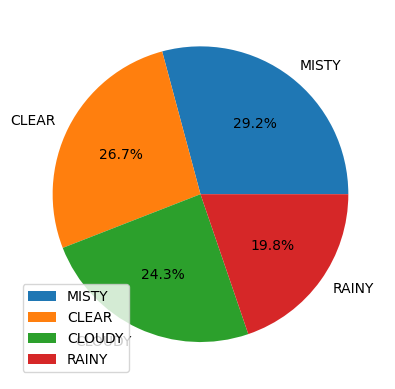

In [ ]:
p=['MISTY','CLEAR','CLOUDY','RAINY']
q=[16363,15000,13643,11082]
plt.pie(q,labels=p,autopct='%1.1f%%')
plt.legend()
plt.show()

In [ ]:
# map the categories into 0,1,2 and 3
new_data['weather']=new_data['weather'].map({'MISTY':0,'CLEAR':1,'CLOUDY':2,'RAINY':3})

<ipython-input-25-b2a690aad3de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr())


<Axes: >

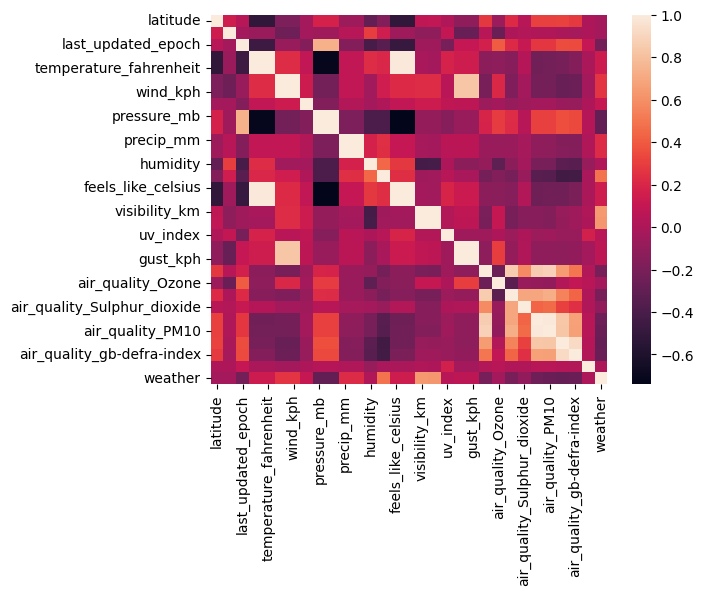

In [ ]:
# to find correlation between numeric columns with 'weather'
sns.heatmap(new_data.corr())
# from the correlation, almost all features are affect the weather, so can't drop any of these columns

In [ ]:
# since the data is of India, this column has only one value
new_data['country'].unique()
# it doesn't affect the output, so can drop this column

array(['India'], dtype=object)

In [ ]:
# to find unique values in 'loaction_name'
new_data['location_name'].unique()
# since there are many values, it can't give perfection to the model

array(['Anantapur', 'Varanasi', 'Mancherial', 'Tawang', 'Rewa', 'Khowai',
       'Kendrapara', 'Fatehpur', 'Balod', 'Jalna', 'Purnia', 'Dhaulpur',
       'Solan', 'Baudh', 'Jalor', 'Saharanpur', 'Barjala', 'Darjiling',
       'Tehri-Garhwal', 'Jhargram', 'Sahibganj', 'Majuli', 'Banka',
       'Mansa', 'Diu', 'Dungarpur', 'Bongaigaon', 'Mandi', 'Saran',
       'Hojai', 'Srinagar', 'Narsimhapur', 'Jharsuguda', 'Datia',
       'Washim', 'Nanded', 'Umaria', 'Sirsa', 'Damoh', 'Yavatmal',
       'Mungeli', 'Haveri', 'Kanniyakumari', 'Firozabad', 'Kangra',
       'Punch', 'Ashoknagar', 'Jashpur', 'Rudraprayag', 'Rajgarh',
       'Tikamgarh', 'Ajmer', 'Kathua', 'Rampur', 'Dhubri', 'Balrampur',
       'Mainpuri', 'Begusarai', 'Ukhrul', 'Jodhpur', 'Basti', 'Patiala',
       'Nirmal', 'Dwarka', 'Bundi', 'Sambalpur', 'Karauli', 'Bhandara',
       'Nandurbar', 'Bellary', 'Bijapur', 'Dhar', 'Ganganagar', 'Yadgir',
       'Kadapa', 'Korba', 'Fatehgarh Sahib', 'Anantnag', 'Jangaon',
       'Jhabua', '

In [ ]:
# to find unique values in 'region'
new_data['region'].unique()

array(['Andhra Pradesh', 'Uttar Pradesh', 'Arunachal Pradesh',
       'Madhya Pradesh', 'Tripura', 'Orissa', 'Rajasthan', 'Chhattisgarh',
       'Maharashtra', 'Bihar', 'Himachal Pradesh', 'West Bengal',
       'Uttarakhand', 'Jharkhand', 'Assam', 'Punjab', 'Daman and Diu',
       'Jammu and Kashmir', 'Haryana', 'Karnataka', 'Tamil Nadu',
       'Manipur', 'Gujarat', 'Nagaland', 'Goa', 'Kerala', 'Puducherry',
       'Mizoram', 'Chandigarh', 'Dadra and Nagar Haveli',
       'Andaman and Nicobar Islands', 'Lakshadweep', 'Delhi'],
      dtype=object)

Uttar Pradesh                  5489
Tamil Nadu                     4325
Madhya Pradesh                 4295
Andhra Pradesh                 3460
Maharashtra                    3190
Orissa                         3019
Bihar                          2867
Rajasthan                      2813
Karnataka                      2638
West Bengal                    2449
Kerala                         2330
Assam                          2317
Chhattisgarh                   2036
Jharkhand                      1985
Haryana                        1965
Gujarat                        1832
Jammu and Kashmir              1778
Punjab                         1708
Manipur                         965
Uttarakhand                     804
Nagaland                        743
Mizoram                         743
Himachal Pradesh                407
Delhi                           366
Puducherry                      302
Tripura                         249
Goa                             221
Arunachal Pradesh           

<Axes: >

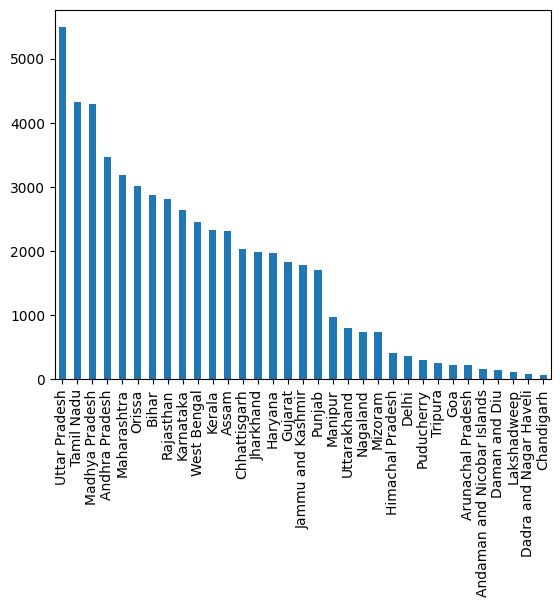

In [ ]:
# 'region' counts and its graphical representation
print(new_data['region'].value_counts())
new_data['region'].value_counts().plot(kind='bar')

In [ ]:
# to find unique values in the column 'timezone'
new_data['timezone'].unique()

array(['Asia/Kolkata', 'Asia/Dhaka', 'Asia/Karachi'], dtype=object)

Asia/Kolkata    55812
Asia/Dhaka        187
Asia/Karachi       89
Name: timezone, dtype: int64


<Axes: >

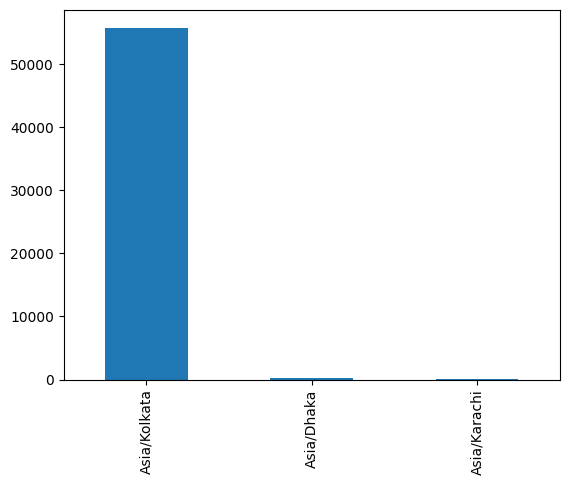

In [ ]:
# 'timezone' counts and its graphical representation
print(new_data['timezone'].value_counts())
new_data['timezone'].value_counts().plot(kind='bar')

In [ ]:
# to find unique values in the column 'wind_direction'
new_data['wind_direction'].unique()

array(['W', 'SE', 'N', 'ENE', 'S', 'NNW', 'SSW', 'E', 'NW', 'SW', 'SSE',
       'ESE', 'NNE', 'NE', 'WNW', 'WSW'], dtype=object)

N      7439
ENE    5718
NE     5289
E      5140
NNE    4286
ESE    3618
W      3318
WNW    3033
WSW    2976
NNW    2933
NW     2858
SE     2754
SW     1826
SSW    1672
SSE    1672
S      1556
Name: wind_direction, dtype: int64


<Axes: >

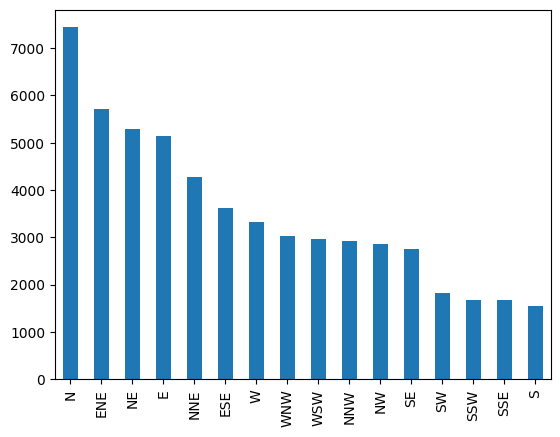

In [ ]:
# 'wind_direction' counts and its graphical representation
print(new_data['wind_direction'].value_counts())
new_data['wind_direction'].value_counts().plot(kind='bar')

In [ ]:
# to find unique values in the column 'moon_phase'
new_data['moon_phase'].unique()

array(['Waning Crescent', 'Waning Gibbous', 'Waxing Gibbous',
       'Waxing Crescent', 'Full Moon', 'First Quarter', 'New Moon',
       'Last Quarter'], dtype=object)

Waning Gibbous     13621
Waning Crescent    11636
Waxing Crescent    11090
Waxing Gibbous     10944
Full Moon           2628
Last Quarter        2254
New Moon            2164
First Quarter       1751
Name: moon_phase, dtype: int64


<Axes: >

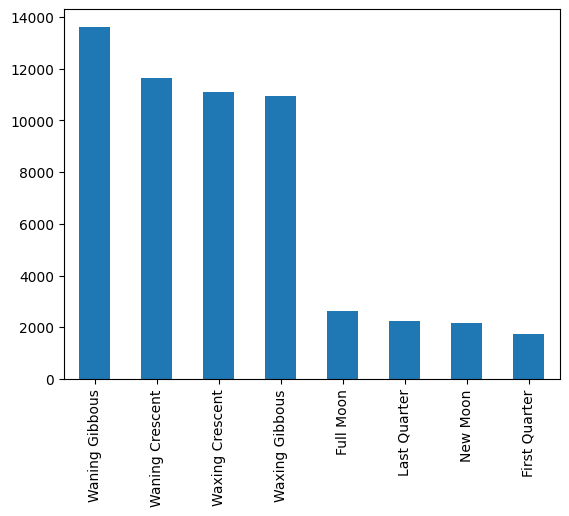

In [ ]:
# 'moon_phase' counts and its graphical representation
print(new_data['moon_phase'].value_counts())
new_data['moon_phase'].value_counts().plot(kind='bar')

In [ ]:
# object datatype column converted into datetime format
new_data['last_updated']=pd.to_datetime(new_data['last_updated'])
new_data['last_updated']

0       2023-09-12 04:30:00
1       2023-11-07 01:45:00
2       2024-01-27 23:30:00
3       2023-12-12 01:00:00
4       2023-10-24 02:15:00
                ...        
56083   2024-03-04 22:30:00
56084   2024-03-04 22:30:00
56085   2024-03-04 22:30:00
56086   2024-03-04 22:30:00
56087   2024-03-04 22:30:00
Name: last_updated, Length: 56088, dtype: datetime64[ns]

In [ ]:
# categorized using month, since weather always
new_data['last_updated']=new_data['last_updated'].dt.month
new_data['last_updated']

0         9
1        11
2         1
3        12
4        10
         ..
56083     3
56084     3
56085     3
56086     3
56087     3
Name: last_updated, Length: 56088, dtype: int64

In [ ]:
# to delete string from the time format hh:mm
new_data['sunrise']=new_data['sunrise'].str.replace(' AM','')
new_data['sunset']=new_data['sunset'].str.replace(' PM','')
new_data['moonrise']=new_data['moonrise'].str.replace(' PM','')
new_data['moonrise']=new_data['moonrise'].str.replace(' AM','')
new_data['moonrise']=new_data['moonrise'].str.replace('No moonrise','00:00')
new_data['moonset']=new_data['moonset'].str.replace(' AM','')
new_data['moonset']=new_data['moonset'].str.replace(' PM','')
new_data['moonset']=new_data['moonset'].str.replace('No moonset','00:00')

In [ ]:
# hh:mm convert into hours, so it changes its datatype as float
new_data['sunrise']=pd.to_datetime(new_data['sunrise'])
new_data['sunrise']=((new_data['sunrise'].dt.hour)+(1/60*(new_data['sunrise'].dt.minute)))
new_data['sunrise']

0        6.133333
1        6.133333
2        6.783333
3        6.033333
4        6.100000
           ...   
56083    5.516667
56084    5.516667
56085    5.566667
56086    6.583333
56087    5.466667
Name: sunrise, Length: 56088, dtype: float64

In [ ]:
new_data['sunset']=pd.to_datetime(new_data['sunset'])
new_data['sunset']=((new_data['sunset'].dt.hour)+(1/60*(new_data['sunset'].dt.minute)))
new_data['sunset']

0        6.400000
1        5.233333
2        6.033333
3        4.466667
4        5.533333
           ...   
56083    5.216667
56084    5.233333
56085    5.283333
56086    6.216667
56087    5.166667
Name: sunset, Length: 56088, dtype: float64

In [ ]:
new_data['moonrise']=pd.to_datetime(new_data['moonrise'])
new_data['moonrise']=((new_data['moonrise'].dt.hour)+(1/60*(new_data['moonrise'].dt.minute)))
new_data['moonrise']

0         2.966667
1         0.000000
2         7.483333
3         4.200000
4         1.966667
           ...    
56083    12.266667
56084    12.266667
56085    12.283333
56086     1.550000
56087    12.233333
Name: moonrise, Length: 56088, dtype: float64

In [ ]:
new_data['moonset']=pd.to_datetime(new_data['moonset'])
new_data['moonset']=((new_data['moonset'].dt.hour)+(1/60*(new_data['moonset'].dt.minute)))
new_data['moonset']

0         4.250000
1         1.400000
2         7.933333
3         2.933333
4         0.000000
           ...    
56083    10.600000
56084    10.650000
56085    10.733333
56086    11.516667
56087    10.533333
Name: moonset, Length: 56088, dtype: float64

In [ ]:
# to check datatype
new_data.dtypes

country                          object
location_name                    object
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                      int64
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64


<Axes: xlabel='temperature_fahrenheit', ylabel='weather'>

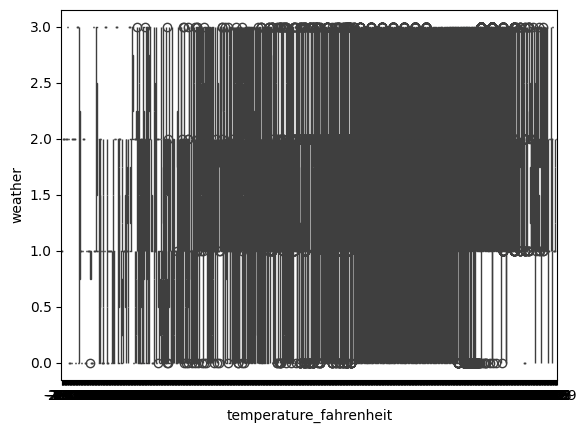

In [ ]:
# to detect the presence of outliers
sns.boxplot(x='temperature_fahrenheit',y='weather',data=new_data)

<Axes: xlabel='wind_degree', ylabel='weather'>

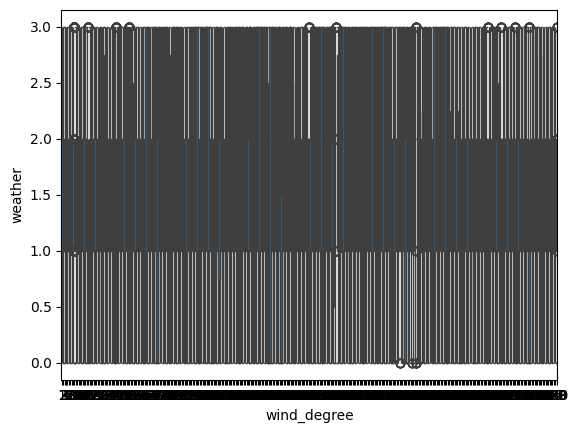

In [ ]:
sns.boxplot(x='wind_degree',y='weather',data=new_data)

<Axes: xlabel='pressure_mb', ylabel='weather'>

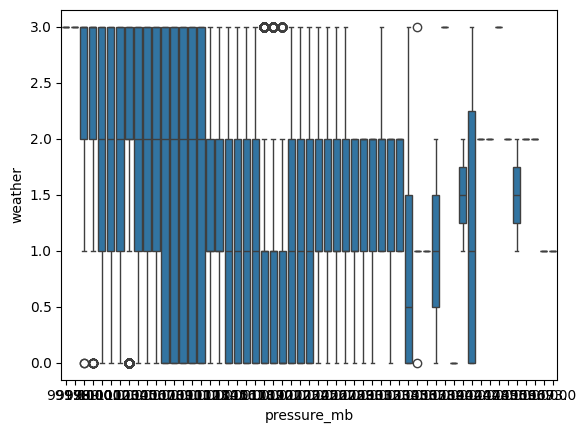

In [ ]:
sns.boxplot(x='pressure_mb',y='weather',data=new_data)

<Axes: xlabel='humidity', ylabel='weather'>

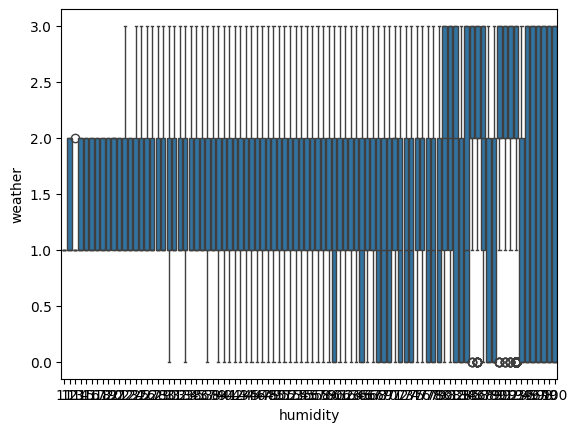

In [ ]:
sns.boxplot(x='humidity',y='weather',data=new_data)

<Axes: xlabel='cloud', ylabel='weather'>

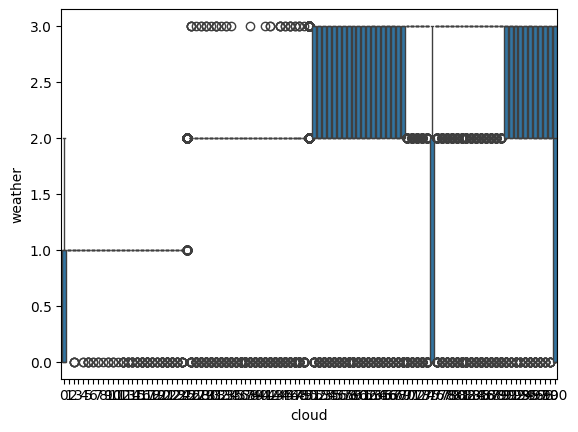

In [ ]:
sns.boxplot(x='cloud',y='weather',data=new_data)

<Axes: xlabel='air_quality_us-epa-index', ylabel='weather'>

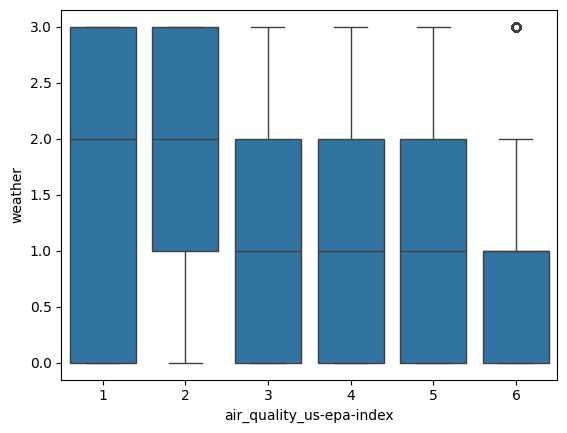

In [ ]:
sns.boxplot(x='air_quality_us-epa-index',y='weather',data=new_data)

<Axes: xlabel='air_quality_gb-defra-index', ylabel='weather'>

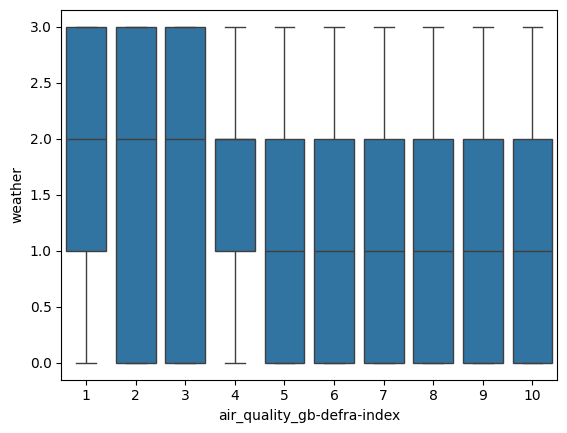

In [ ]:
sns.boxplot(x='air_quality_gb-defra-index',y='weather',data=new_data)

<Axes: xlabel='moon_illumination', ylabel='weather'>

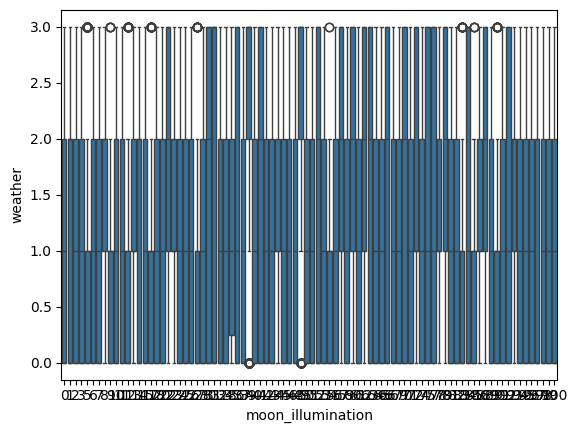

In [ ]:
sns.boxplot(x='moon_illumination',y='weather',data=new_data)

In [ ]:
# to drop unwanted columns
new_data.drop(['country','location_name','condition_text'],axis=1,inplace=True)
new_data.head()

,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,weather
0,Andhra Pradesh,14.68,77.60,Asia/Kolkata,1694473200,9,24.4,75.9,18.3,29.5,...,3.0,1,1,6.133333,6.400000,2.966667,4.250000,Waning Crescent,14,1
1,Uttar Pradesh,25.33,83.00,Asia/Kolkata,1699301700,11,21.4,70.5,2.2,3.6,...,330.6,6,10,6.133333,5.233333,0.000000,1.400000,Waning Crescent,44,1
2,Andhra Pradesh,18.87,79.43,Asia/Kolkata,1706378400,1,21.0,69.9,3.4,5.4,...,116.3,4,10,6.783333,6.033333,7.483333,7.933333,Waning Gibbous,98,1
3,Arunachal Pradesh,27.58,91.87,Asia/Kolkata,1702323000,12,-0.6,30.9,5.4,8.6,...,3.8,1,1,6.033333,4.466667,4.200000,2.933333,Waning Crescent,5,1
4,Madhya Pradesh,24.53,81.30,Asia/Kolkata,1698093900,10,19.0,66.3,2.2,3.6,...,110.2,4,10,6.100000,5.533333,1.966667,0.000000,Waxing Gibbous,60,1


In [ ]:
# encoded the object columns using get_dummies
data1=pd.get_dummies(new_data[['region','timezone','wind_direction','moon_phase']],drop_first=True)
data1

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,wind_direction_W,wind_direction_WNW,wind_direction_WSW,moon_phase_Full Moon,moon_phase_Last Quarter,moon_phase_New Moon,moon_phase_Waning Crescent,moon_phase_Waning Gibbous,moon_phase_Waxing Crescent,moon_phase_Waxing Gibbous
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
56084,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
56085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
56086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# to join data with encoded data and drop unwanted columns
DATA=pd.concat([data1,new_data],axis=1)
DATA.drop(['region','timezone','wind_direction','moon_phase'],axis=1,inplace=True)
DATA

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination,weather
0,1,0,0,0,0,0,0,0,0,0,...,1.8,3.0,1,1,6.133333,6.400000,2.966667,4.250000,14,1
1,0,0,0,0,0,0,0,0,0,0,...,260.8,330.6,6,10,6.133333,5.233333,0.000000,1.400000,44,1
2,1,0,0,0,0,0,0,0,0,0,...,107.7,116.3,4,10,6.783333,6.033333,7.483333,7.933333,98,1
3,0,1,0,0,0,0,0,0,0,0,...,2.9,3.8,1,1,6.033333,4.466667,4.200000,2.933333,5,1
4,0,0,0,0,0,0,0,0,0,0,...,96.0,110.2,4,10,6.100000,5.533333,1.966667,0.000000,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56083,0,0,0,0,0,0,0,0,0,0,...,54.4,63.0,3,7,5.516667,5.216667,12.266667,10.600000,46,3
56084,0,0,0,0,0,0,0,0,0,0,...,46.0,51.2,3,5,5.516667,5.233333,12.266667,10.650000,46,3
56085,0,0,0,0,0,0,0,0,0,0,...,65.8,71.7,4,9,5.566667,5.283333,12.283333,10.733333,46,3
56086,0,0,0,0,0,0,0,0,0,0,...,4.9,6.9,1,1,6.583333,6.216667,1.550000,11.516667,46,3


SEPARATING X AS INPUT AND Y AS OUTPUT

In [ ]:
x=DATA.drop(['weather'],axis=1)
x

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
0,1,0,0,0,0,0,0,0,0,0,...,0.4,1.8,3.0,1,1,6.133333,6.400000,2.966667,4.250000,14
1,0,0,0,0,0,0,0,0,0,0,...,47.7,260.8,330.6,6,10,6.133333,5.233333,0.000000,1.400000,44
2,1,0,0,0,0,0,0,0,0,0,...,9.3,107.7,116.3,4,10,6.783333,6.033333,7.483333,7.933333,98
3,0,1,0,0,0,0,0,0,0,0,...,0.3,2.9,3.8,1,1,6.033333,4.466667,4.200000,2.933333,5
4,0,0,0,0,0,0,0,0,0,0,...,4.4,96.0,110.2,4,10,6.100000,5.533333,1.966667,0.000000,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56083,0,0,0,0,0,0,0,0,0,0,...,1.8,54.4,63.0,3,7,5.516667,5.216667,12.266667,10.600000,46
56084,0,0,0,0,0,0,0,0,0,0,...,1.3,46.0,51.2,3,5,5.516667,5.233333,12.266667,10.650000,46
56085,0,0,0,0,0,0,0,0,0,0,...,3.6,65.8,71.7,4,9,5.566667,5.283333,12.283333,10.733333,46
56086,0,0,0,0,0,0,0,0,0,0,...,0.9,4.9,6.9,1,1,6.583333,6.216667,1.550000,11.516667,46


In [ ]:
y=DATA['weather']
y

0        1
1        1
2        1
3        1
4        1
        ..
56083    3
56084    3
56085    3
56086    3
56087    3
Name: weather, Length: 56088, dtype: int64

SPLITTING DATA INTO TRAIN SET AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
29705,0,0,0,0,0,0,0,0,0,0,...,11.3,279.7,302.9,6,10,6.283333,5.783333,10.783333,0.000000,43
14417,0,0,0,0,0,0,0,0,0,0,...,0.7,20.8,39.6,2,2,6.300000,6.066667,0.000000,1.983333,46
10428,0,0,1,0,0,0,0,0,0,0,...,8.9,91.2,114.7,4,10,6.166667,4.683333,9.350000,8.166667,12
7599,0,0,0,0,0,1,0,0,0,0,...,4.7,37.8,51.3,2,4,6.200000,5.933333,11.833333,9.950000,66
48679,0,0,0,0,0,0,0,0,0,0,...,3.3,40.3,41.6,2,4,6.116667,6.283333,11.600000,10.250000,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,0,0,0,0,0,0,0,0,0,0,...,0.6,50.7,72.2,3,6,6.783333,6.650000,10.433333,9.600000,83
54343,0,0,0,0,0,0,0,0,0,0,...,1.2,275.5,288.7,6,10,7.016667,5.616667,10.366667,10.700000,78
38158,0,0,0,0,0,0,0,0,0,0,...,3.5,78.1,90.5,4,10,6.366667,5.916667,10.983333,10.633333,24
860,0,0,0,0,0,0,0,0,0,0,...,32.4,308.2,323.1,6,10,6.533333,5.333333,8.333333,9.116667,91


In [ ]:
x_test

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
26747,0,0,0,0,0,0,0,0,0,0,...,6.1,41.7,49.8,3,4,6.766667,6.366667,10.816667,11.216667,26
54549,0,0,0,0,0,0,0,0,0,0,...,1.6,14.4,16.6,1,2,6.583333,6.150000,2.350000,2.233333,23
6667,0,0,0,0,0,0,0,0,0,0,...,18.4,276.3,318.4,6,10,6.216667,5.333333,4.916667,3.466667,6
19893,0,0,0,0,0,0,0,0,0,0,...,49.6,600.2,807.4,6,10,5.566667,5.183333,7.683333,6.816667,5
19593,0,0,0,0,0,0,0,0,0,0,...,0.0,3.9,4.0,1,1,5.233333,4.916667,3.833333,4.200000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51574,0,0,0,0,0,0,0,0,0,0,...,1.7,29.0,34.8,2,3,6.350000,5.900000,7.616667,6.816667,2
41144,0,0,0,0,0,0,0,0,0,0,...,6.0,87.0,99.0,4,10,6.733333,6.100000,11.383333,11.183333,70
12124,0,0,0,0,0,0,0,0,0,0,...,15.0,180.1,217.6,5,10,6.166667,6.083333,7.433333,7.966667,96
53719,0,0,0,0,0,0,0,0,0,0,...,0.1,11.1,11.2,1,1,6.300000,5.350000,0.000000,12.333333,52


In [ ]:
y_train

29705    0
14417    1
10428    1
7599     1
48679    3
        ..
44732    2
54343    3
38158    2
860      1
15795    0
Name: weather, Length: 39261, dtype: int64

In [ ]:
y_test

26747    0
54549    3
6667     1
19893    0
19593    0
        ..
51574    3
41144    2
12124    1
53719    3
5053     1
Name: weather, Length: 16827, dtype: int64

NORMALIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MODEL CREATION

K Nearest Neighbors Model and its Performance Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
clf=KNeighborsClassifier()
pmtr={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
gd=GridSearchCV(clf,pmtr,cv=10,scoring='accuracy')  # CV = CrossValidation
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(gd.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


[[4401   75  122  166]
 [  94 3718  649   99]
 [ 206  825 2611  539]
 [ 212  185  688 2237]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4764
           1       0.77      0.82      0.79      4560
           2       0.64      0.62      0.63      4181
           3       0.74      0.67      0.70      3322

    accuracy                           0.77     16827
   macro avg       0.76      0.76      0.76     16827
weighted avg       0.77      0.77      0.77     16827



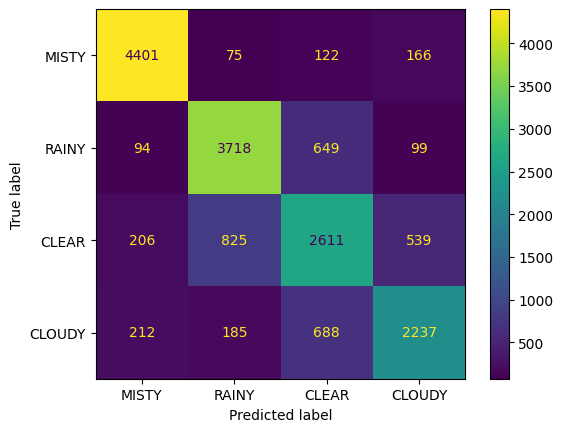

In [ ]:
k_model=KNeighborsClassifier(n_neighbors=7,weights='distance')
k_model.fit(x_train,y_train)
y_pred1=k_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred1)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','RAINY','CLEAR','CLOUDY'])
dis.plot()
print(classification_report(y_test,y_pred1))

Naive Bayes Model and its Performance Evaluation

[[4679   11   30   44]
 [ 470 3961   86   43]
 [1890  970 1205  116]
 [1978    1  537  806]]
              precision    recall  f1-score   support

           0       0.52      0.98      0.68      4764
           1       0.80      0.87      0.83      4560
           2       0.65      0.29      0.40      4181
           3       0.80      0.24      0.37      3322

    accuracy                           0.63     16827
   macro avg       0.69      0.60      0.57     16827
weighted avg       0.68      0.63      0.59     16827



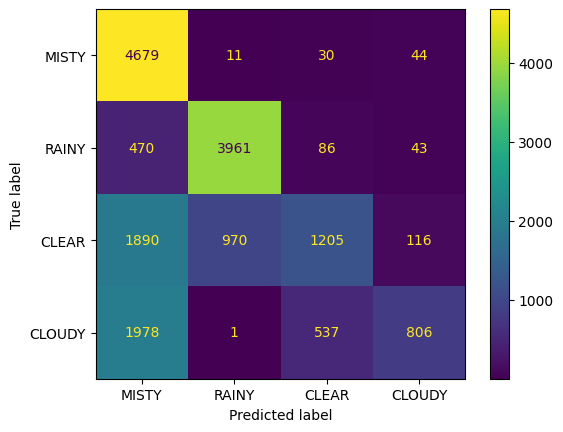

In [ ]:
from sklearn.naive_bayes import GaussianNB
n_model=GaussianNB()
n_model.fit(x_train,y_train)
y_pred2=n_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred2)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','RAINY','CLEAR','CLOUDY'])
dis.plot()
print(classification_report(y_test,y_pred2))

Support Vector Machine Model and its Performance Evaluation

[[4702    7   20   35]
 [  18 4372  170    0]
 [ 172   80 3574  355]
 [ 200   10  294 2818]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4764
           1       0.98      0.96      0.97      4560
           2       0.88      0.85      0.87      4181
           3       0.88      0.85      0.86      3322

    accuracy                           0.92     16827
   macro avg       0.92      0.91      0.91     16827
weighted avg       0.92      0.92      0.92     16827



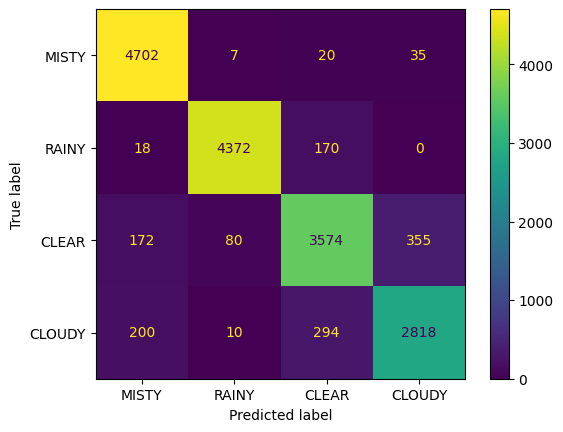

In [ ]:
from sklearn.svm import SVC
s_model=SVC()
s_model.fit(x_train,y_train)
y_pred3=s_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred3)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','RAINY','CLEAR','CLOUDY'])
dis.plot()
print(classification_report(y_test,y_pred3))

Decision Tree Model and its Performance Evaluation

[[4671    7   22   64]
 [   7 4544    9    0]
 [  28   16 4133    4]
 [  87    0    5 3230]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4764
           1       0.99      1.00      1.00      4560
           2       0.99      0.99      0.99      4181
           3       0.98      0.97      0.98      3322

    accuracy                           0.99     16827
   macro avg       0.99      0.98      0.98     16827
weighted avg       0.99      0.99      0.99     16827



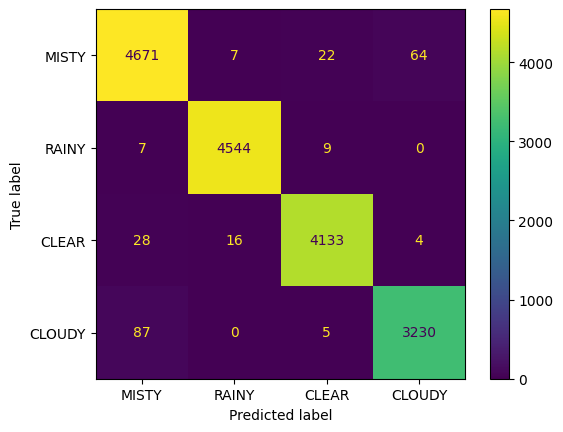

In [ ]:
from sklearn.tree import DecisionTreeClassifier
t_model=DecisionTreeClassifier()
t_model.fit(x_train,y_train)
y_pred4=t_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred4)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','RAINY','CLEAR','CLOUDY'])
dis.plot()
print(classification_report(y_test,y_pred4))
# since it has large no. of features, creation of tree is difficult

Random Forest Model and its Performance Evaluation

[[4671    7   22   64]
 [   7 4544    9    0]
 [  28   16 4133    4]
 [  87    0    5 3230]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4764
           1       0.99      1.00      1.00      4560
           2       0.99      0.99      0.99      4181
           3       0.98      0.97      0.98      3322

    accuracy                           0.99     16827
   macro avg       0.99      0.98      0.98     16827
weighted avg       0.99      0.99      0.99     16827



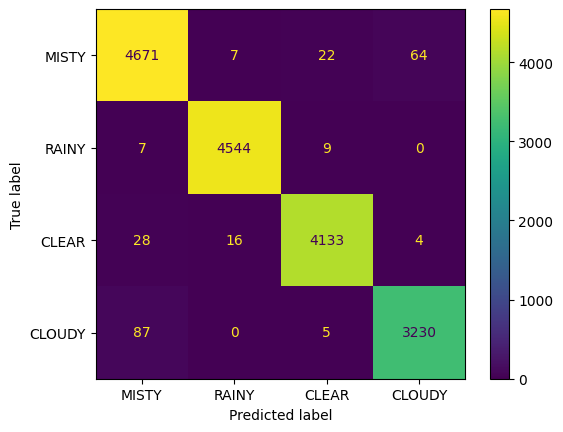

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)
y_pred5=t_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred5)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','RAINY','CLEAR','CLOUDY'])
dis.plot()
print(classification_report(y_test,y_pred5))